In [1]:
"""This is a multiclass single label instance of classification problem on reuters dataset."""
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import reuters
from keras import layers
from keras import models

#Loading data from reuters datset
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [3]:
#Building the model
model = models.Sequential()
model.add(layers.Dense(64, activation= 'relu', input_shape= (10000,)))
model.add(layers.Dense(64, activation= 'relu'))
model.add(layers.Dense(46, activation= 'softmax'))

In [4]:
#Compiling the model with proper loss function
model.compile(optimizer= 'rmsprop',
              loss= 'categorical_crossentropy',
              metrics= ['accuracy'])

In [5]:
#making a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [6]:
#Training the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs= 20,
                    batch_size= 512,
                    validation_data= (x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 151us/step - loss: 2.5757 - accuracy: 0.4895 - val_loss: 1.6996 - val_accuracy: 0.6530
Epoch 2/20
7982/7982 [==============================] - 1s 129us/step - loss: 1.3836 - accuracy: 0.7043 - val_loss: 1.2667 - val_accuracy: 0.7190
Epoch 3/20
7982/7982 [==============================] - 1s 128us/step - loss: 1.0123 - accuracy: 0.7831 - val_loss: 1.1044 - val_accuracy: 0.7550
Epoch 4/20
7982/7982 [==============================] - 1s 128us/step - loss: 0.7908 - accuracy: 0.8341 - val_loss: 0.9930 - val_accuracy: 0.7970
Epoch 5/20
7982/7982 [==============================] - 1s 128us/step - loss: 0.6268 - accuracy: 0.8693 - val_loss: 0.9284 - val_accuracy: 0.8070
Epoch 6/20
7982/7982 [==============================] - 1s 128us/step - loss: 0.4976 - accuracy: 0.8975 - val_loss: 0.9067 - val_accuracy: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 129us/step - loss

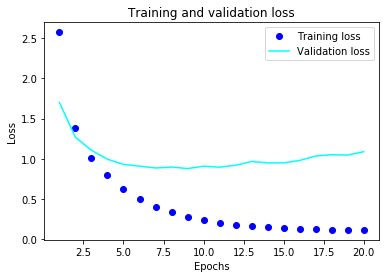

In [7]:
#Plotting the graphs 
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'cyan', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

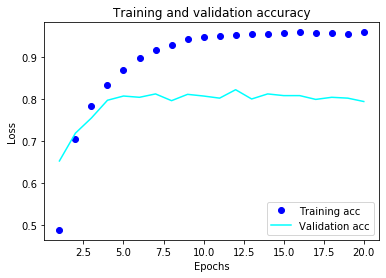

In [8]:
plt.clf()

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_accuracy, 'cyan', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [9]:
result = model.evaluate(x_test, one_hot_test_labels)
print("Accuracy  ---->   " + str(result[1]))

2246/2246 [==============================] - 0s 122us/step
Accuracy  ---->   0.7809438705444336
